In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns
sns.set_style("whitegrid")


In [8]:
df_main = pd.read_csv('Crawl/Data/Perfume_Data3.csv')
df_main.head()

,sothutu,name,brand,pricenew,sale,priceold,volume
0,0,Nước Hoa Nữ Diamond Femme (Trắng),Eau De Parfum,301000,45%,549000,45ml
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh Mẽ,Inner Perfume #Eau De Bijou,144000,59%,350000,5ml
2,2,Nước Hoa Nữ Diamond Femme Pink (Hồng),Eau De Parfum,275000,50%,549000,45ml
3,3,Nước Hoa Nam Diamond Homme (Đen),Eau De Parfum,275000,50%,549000,45ml
4,4,Nước Hoa Nữ Diamond Femme Ruby Red (Đỏ),Eau De Parfum,301000,45%,549000,45ml


In [9]:
print(df_main.shape)

(1000, 7)


In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sothutu   1000 non-null   int64 
 1   name      1000 non-null   object
 2   brand     858 non-null    object
 3   pricenew  1000 non-null   int64 
 4   sale      1000 non-null   object
 5   priceold  1000 non-null   int64 
 6   volume    1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [11]:
df_main.describe()

,sothutu,pricenew,priceold
count,1000.000000,1.000000e+03,1.000000e+03
mean,507.575000,2.487787e+06,3.308818e+06
std,293.167924,3.243318e+06,4.274206e+06
min,0.000000,4.400000e+04,6.900000e+04
25%,252.750000,3.540000e+05,5.070000e+05
50%,507.500000,8.950000e+05,1.200000e+06
75%,761.250000,3.631750e+06,4.442500e+06
max,1014.000000,1.966500e+07,2.495000e+07


In [12]:
print(df_main.isna().sum())

sothutu       0
name          0
brand       142
pricenew      0
sale          0
priceold      0
volume        0
dtype: int64


In [13]:
# Xử lý cột 'sale' để chuyển đổi thành phần trăm giảm giá
# Loại bỏ ký hiệu phần trăm và các ký tự không mong muốn
df_main['sale'] = df_main['sale'].str.replace('%', '').str.replace('(', '').str.replace(')', '').str.replace('-', '')


In [14]:
# Chuyển đổi giá trị thành số thực
df_main['discount_percent'] = pd.to_numeric(df_main['sale'], errors='coerce')


In [15]:
# Đổi tên cột cho phù hợp với ngữ cảnh
df_main.rename(columns={
    'name': 'Tên_Sản_Phẩm', 
    'brand': 'Thương_Hiệu', 
    'pricenew': 'Giá_Bán', 
    'priceold': 'Giá_Gốc', 
    'discount_percent': 'Phần_Trăm_Giảm', 
    'volume': 'Dung_Tich'
}, inplace=True)

In [16]:
# Loại bỏ các cột không cần thiết
df_main.drop(columns=['sale'], inplace=True)


In [17]:
# Hiển thị dataframe đã được chỉnh sửa
df_main.head()

,sothutu,Tên_Sản_Phẩm,Thương_Hiệu,Giá_Bán,Giá_Gốc,Dung_Tich,Phần_Trăm_Giảm
0,0,Nước Hoa Nữ Diamond Femme (Trắng),Eau De Parfum,301000,549000,45ml,45
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh Mẽ,Inner Perfume #Eau De Bijou,144000,350000,5ml,59
2,2,Nước Hoa Nữ Diamond Femme Pink (Hồng),Eau De Parfum,275000,549000,45ml,50
3,3,Nước Hoa Nam Diamond Homme (Đen),Eau De Parfum,275000,549000,45ml,50
4,4,Nước Hoa Nữ Diamond Femme Ruby Red (Đỏ),Eau De Parfum,301000,549000,45ml,45


In [18]:
df_main.to_csv('Crawl/Data/Perfume_Data3.csv', index=False)


In [19]:
# Phân tích dữ liệu thăm dò (EDA)
# Định nghĩa các cột phân loại để trực quan hóa
cat_cols = ['Thương_Hiệu']

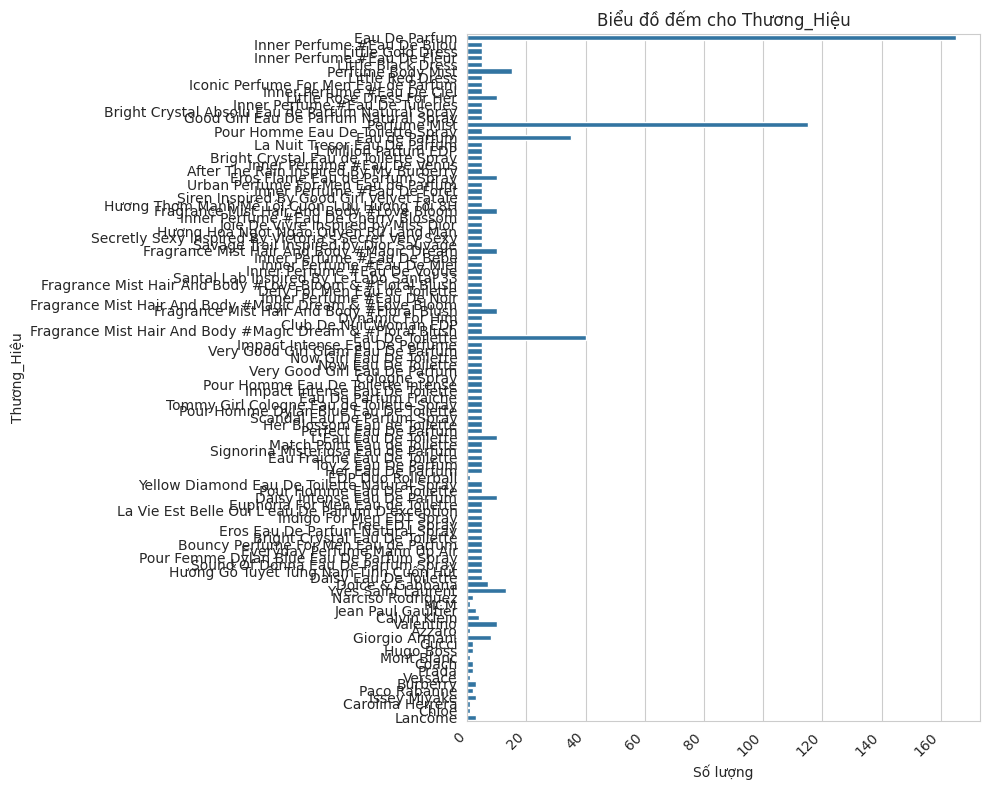

In [20]:
# Vẽ biểu đồ đếm cho các cột phân loại
for col in cat_cols:
    plt.figure(figsize=[10, 8])  # Tăng chiều cao của biểu đồ để phù hợp với nhiều nhãn hàng
    sns.countplot(y=col, data=df_main)  # Đổi x=col thành y=col
    plt.title(f'Biểu đồ đếm cho {col}')
    plt.xlabel('Số lượng')  # Nhãn trục x
    plt.ylabel(col)  # Nhãn trục y là tên cột
    plt.xticks(rotation=45, ha='right')  # Xoay nhãn trên trục x để tránh chồng chéo
    plt.tight_layout()  # Đảm bảo bố cục không bị cắt xén
    plt.show()


In [ ]:
# Nếu bạn có các cột số liệu muốn phân tích, bạn có thể vẽ biểu đồ phân phối
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
for col in num_cols:
    plt.figure(figsize=[10, 4])
    sns.histplot(df_main[col], kde=True)
    plt.title(f'Biểu đồ phân phối cho {col}')
    plt.show()

In [ ]:
# Định nghĩa các cột số liệu để phân tích
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
i = 0
while i < len(num_cols):
    fig = plt.figure(figsize=[13, 3])
    
    # Vẽ biểu đồ boxplot cho từng cột
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    if i < len(num_cols):  # Kiểm tra để tránh vượt quá danh sách các cột
        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_cols[i], data=df_main)
        i += 1
    
    plt.show()

In [ ]:
# Giả sử df_main đã được định nghĩa từ trước
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']

# Tạo bảng số liệu thống kê
stats_table = df_main[num_cols].describe().transpose()
stats_table['median'] = df_main[num_cols].median()

# Hiển thị bảng số liệu thống kê
print(stats_table)

In [ ]:
# Hiển thị các hàng có giá bán cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Bán'] > df_main['Giá_Bán'].quantile(0.99)])


In [ ]:

# Hiển thị các hàng có giá gốc cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Gốc'] > df_main['Giá_Gốc'].quantile(0.99)])


In [ ]:
# Hiển thị các hàng có phần trăm giảm giá cao hơn ngưỡng 99%
print(df_main[df_main['Phần_Trăm_Giảm'] > df_main['Phần_Trăm_Giảm'].quantile(0.99)])


In [ ]:
# Lọc các cột số liệu
numeric_df = df_main[['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']]

# Vẽ biểu đồ heatmap để hiển thị tương quan giữa các biến
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

# Hiển thị tương quan của cột 'Giá_Bán' với các cột khác
print(numeric_df.corr()['Giá_Bán'])
